# ORIE 4580/5580/5581 Assignment 3

#### Students: Junliang Wu (jw2727) and Kexin Wang (kw677)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [1]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [4]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')


def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)
def LCG(n, m, a, c=0, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output

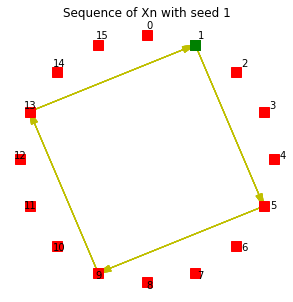

In [88]:
# Ans
fig = plt.figure(figsize=(5,5))
x = LCG(n=17,m=16,a=5,c=0,seed =1)
#print(x)
plot_clock_face(16,fig,annotate = True)
plot_clock_path(16,x,fig)
#plt.axis('equal')
plt.axis('off')
plt.title('Sequence of Xn with seed 1')
plt.show()

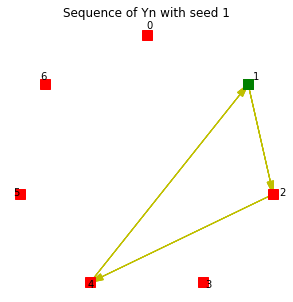

In [119]:
fig = plt.figure(figsize=(5,5))
x = LCG(n=8,m=7,a=2, c=0, seed =1)
plot_clock_face(7, fig, annotate =True)
plot_clock_path(7, x,fig)
plt.axis('equal')
plt.axis('off')
plt.title('Sequence of Yn with seed 1')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

In [105]:
def combined_LCG(n = 16,a1=5, a2=2, c1=0, c2=0,m1=16, m2=7,m=16, c=0, seed1=1, seed2=1):
    """
    Generate a pseudorandom sequence using combined two Linear Congruential Generators (LCG).
    
    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    
    output = np.zeros(n)

    x = seed1
    y = seed2
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + y + 1.0) / (m + 1.0)
        x = (a1 * x + c1) % m1
        y = (a2 * y + c2) % m2
        # Update the LCG state using the specified parameters
        z = (x + y) % m
    return output


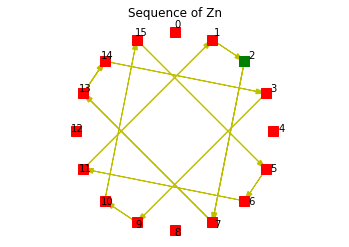

In [109]:
x=combined_LCG(n = 16,a1=5, a2=2, c1=0, c2=0,m1=16, m2=7,m=16, c=0)
plot_clock_face(16,fig,annotate = True)
plot_clock_path(16,x,fig)
plt.axis('equal')
plt.axis('off')
plt.title('Sequence of Zn')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.
Based on the clock face we had in part(a) and part(b), we can see that the period of Xn is 4, the period of Yn is 3, and the period of Zn is 12. We determine period by after how many operations the arrow goes back to the starting point(green point in three cases).

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x =1$}
	 \end{cases}$$
___

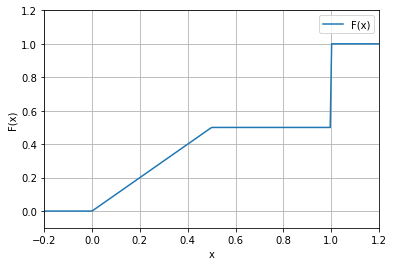

In [37]:
def F(x):
    if x < 0:
        return 0
    elif 0 <= x < 1/2:
        return x
    elif 1/2 <= x < 1:
        return 1/2
    else:
        return 1

# Create an array of x values
x = np.linspace(-1, 2, 500)  # Adjust the range as needed

# Calculate the corresponding y values using the piecewise function
y = [F(xi) for xi in x]

# Create the plot
plt.plot(x, y, label='F(x)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.xlim(-0.2, 1.2)
plt.ylim(-0.1, 1.2)
# Show the plot
plt.grid(True)
plt.show()

### Ans.


$F^{-1}(y)=
\begin{cases}
    0 & \text{if y = 0} \\
    y & \text{if 0<y}\leq \frac{1}{2} \\
    \frac{1}{2} & \text{if} \frac{1}{2} \le y \leq 1\\
    1 & \text{if y =1}
\end{cases}
$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

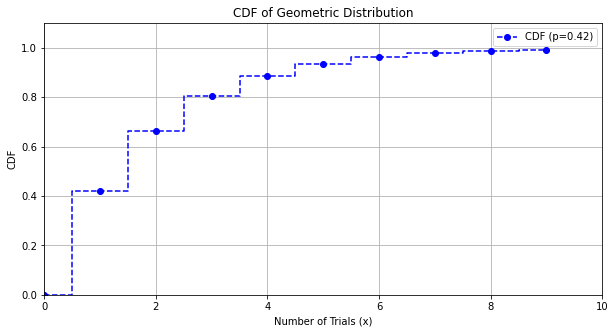

In [134]:

# Define the probability parameter (p) for the geometric distribution
p = 0.42

# Create an array of x values (number of trials)
x = np.arange(0, 10,1)  # Adjust the range as needed

# Calculate the CDF values for each x
cdf = 1 - (1 - p) ** (x )  # Adding 1 to x to make it inclusive
fig = plt.figure(figsize=(10,5))
# Create the step plot for the CDF with discontinuity
plt.plot(x, cdf, drawstyle='steps-mid',marker='o', linestyle='--', color='b', label=f'CDF (p={p})')

# Add labels and legend
plt.xlabel('Number of Trials (x)')
plt.ylabel('CDF')
plt.title('CDF of Geometric Distribution')
plt.legend()
# Show the plot
plt.xlim(0, 10)
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()


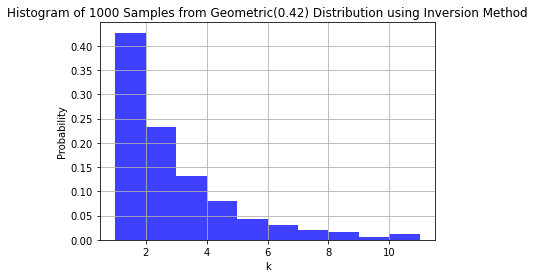

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameter for the geometric distribution
p = 0.42

# Number of samples to generate
num_samples = 1000

# Generate random samples from a uniform distribution between 0 and 1
uniform_samples = np.random.uniform(0, 1, num_samples)

# Calculate the inverse transform using the geometric CDF
geometric_samples = np.floor(np.log(1 - uniform_samples) / np.log(1 - p))

# Plot the histogram of generated samples
plt.hist(geometric_samples, bins=np.arange(1, max(geometric_samples) + 1) , density=True, alpha=0.75, color='b')
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Histogram of 1000 Samples from Geometric(0.42) Distribution using Inversion Method')
plt.grid(True)
plt.show()

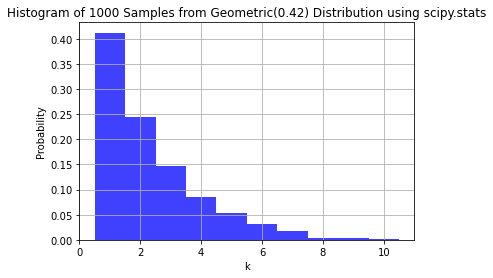

In [62]:
p = 0.42
from scipy.stats import geom

# Number of samples to generate
num_samples = 1000

# Generate random samples from the geometric distribution using scipy.stats
samples = geom(p).rvs(size=num_samples)

# Plot the histogram of generated samples
plt.hist(samples, bins=np.arange(1, max(samples) + 1) - 0.5, density=True, alpha=0.75, color='b')
plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Histogram of 1000 Samples from Geometric(0.42) Distribution using scipy.stats')
plt.grid(True)
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

$$
	F(x) =
	\begin{cases}
		e^{x-2}-e^{-2} & \text{for }0 \leq x \leq 2, \\
		1-e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$

$$
	F^{-1}(u) =
	\begin{cases}
		ln(u+e^{-2})+2 & \text{for }0 \leq u < 1-e^{-2}, \\
		-ln(1-u) & \text{for } 1-e^{-2} \leq u \leq 1 \\
		0 & \text{otherwise,}
	\end{cases}
	$$

* First generate 1000 samples from uniform distribution (call it u) and plug into the inverse function of CDF to generate samples of X
* If u is less than $1-e^{-2}$ then $x =ln(u + e^{-2})$
* If u is between $1-e^{-2}$ and 1 then $x = -ln(1-u)$


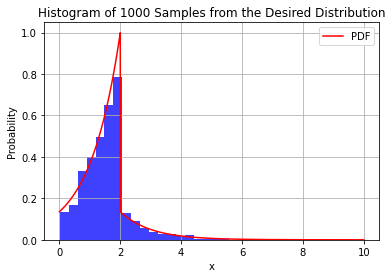

In [29]:

# Number of samples to generate
num_samples = 1000

# Generate random samples from a uniform distribution between 0 and 1
uniform_samples = np.random.uniform(0, 1, num_samples)

# Initialize an empty list to store the generated values of x
x_samples = []

# Define the inverse transform function for x
for u in uniform_samples:
    if u < 1 - np.exp(-2):
        x = np.log(u + np.exp(-2))+2
    else:
        x = -np.log(1 - u)
    x_samples.append(x)


# Plot the histogram of generated samples
plt.hist(x_samples, bins=30, density=True, alpha=0.75, color='b')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend('Samples')
plt.title('Histogram of 1000 Samples from the Desired Distribution')

def pdf(x):
    if 0 <= x <= 2:
        return np.exp(x-2)
    else:
        return np.exp(-x)
    
# Create an array of x values for the PDF curve
x_values = np.linspace(0, 10, 10000)  # Range from 0 to 4/3

# Calculate the corresponding PDF values
pdf_values = [pdf(x) for x in x_values]

# Plot the PDF curve
plt.plot(x_values, pdf_values, 'r-', label='PDF')

plt.legend()
plt.grid(True)
plt.show()




___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


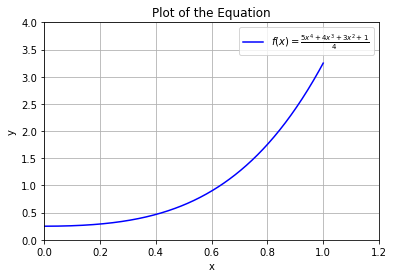

In [72]:
x = np.linspace(0, 1, 400)

# Calculate the corresponding y values using the equation
y = (5 * x**4 + 4 * x**3 + 3 * x**2 + 1) / 4

# Create the plot
plt.plot(x, y, label=r'$f(x)=\frac{5x^4 + 4x^3 + 3x^2 + 1}{4}$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Equation')
plt.legend()
plt.grid(True)
plt.xlim(0, 1.2)
plt.ylim(0, 4)
# Show the plot
plt.show()

* Choose M to be 13/4 The acceptance-rejection algorithm 
* First generte 2 uniform samples from Uniform[0,1](call it u1 and u2) and than check if u2 <=f(x)/cg(x), if it's true we keep u1, otherwise we regenerate 2 uniform samples  from Uniform[0,1]

In [105]:
import random
c = 13/4
#The acceptance-rejection algorithm 
def accep_rej(n):
    X = []
    while len(X)<=n:
        Y = random.uniform(0,1)
        U = random.uniform(0,1)
        if U <= (5*Y**4 + 4*Y**3 + 3*Y**2 + 1)/13:
            X.append(Y)
    return X

#For example, if we want to generate 10 samples
print(accep_rej(10))

[0.3811169023048241, 0.9547933748811147, 0.9410968044211618, 0.598789643717158, 0.5051606386092203, 0.5918597736904203, 0.36250074034629776, 0.8810514896808599, 0.8762282742377873, 0.20354272723893552, 0.9276236467367792]


___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

### Ans.


First, we find P(acceptance) = $\int_{0}^{1}\frac{5x^{4}+4x^{3}+3x^{2}+1}{13}dx = \frac{1}{13}(x^{5}+x^{4}+x^{3}+x) = \frac{4}{13}$ Since E(acceptance) = 1/P(acceptance), we know E(acceptance) = $\frac{13}{4}$

___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


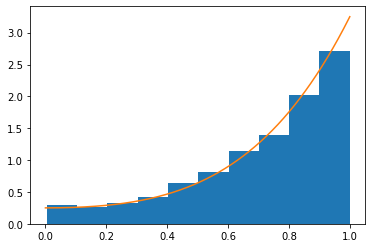

In [106]:
plt.hist(accep_rej(2500), density = True, label = "samples of X")
true_X = np.linspace(0,1,1000)
def f(x):
    if 0<=x<=1:
        return(5*x**4 + 4*x**3 + 3*x**2 + 1)/4
    else:
        return 0
value = [f(x) for x in true_X]
plt.plot(true_X, value, label = "true pdf")

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a Laplace(i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

* First we want to calculate cdf G(x) such that $G(x)= \begin{cases}
                                                \frac{e^x}{2} & \text{if x}\leq 0 \\
                                                1-\frac{e^{-x}}{2} & \text{if x >0}  \\ 
                                            \end{cases}$ by integrating over regions
                                           
* Second we determine the inversion of G(x) such that $G^{-1}(u)= \begin{cases}
                                                ln^{2u} & \text{if u}\leq 0.5 \\
                                                -ln^{2-2u} & \text{if u >0.5}  \\ 
                                            \end{cases}$
                                           
                                           
* The algorithm is to generate samples from uniform distribution and plug into      $G^{-1}(u)$       to get samples of this distribution and call it U.


___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.

Since $\frac{f(x)}{g(x)} =\sqrt\frac{2}{\pi} * \frac{e^\frac{-x^2}{2}}{e^-|x|} = \sqrt\frac{2}{\pi}e^{-x^2/2 + |x|} $
And we want to find the maximum ratio between f(x) and g(x).\
Since h(x) = e^x is an increasing function, so it's equivalent as maximizing $-x^2/2 +|x|$ which is an even function therefore we can only maximize it when x >0.\
When x >0, $-x^2/2 +|x|$ is $-x^2/2 +x$, and by taking derivative and set it to 0, we have -x+1=0 so x =1.\
Therefore the maximum value is obtained at x =1 which is equal to

$k = e^{1/2}\sqrt(\frac{2}{\pi}) = 1.315489247...$

The expected number of times to generate an accepted sample is k which is 1.315489247...
* First we want to calculate cdf G(x) such that $G(x)= \begin{cases}
                                                \frac{e^x}{2} & \text{if x}\leq 0 \\
                                                1-\frac{e^{-x}}{2} & \text{if x >0}  \\ 
                                            \end{cases}$ by integrating over regions
                                           
* Second we determine the inversion of G(x) such that $G^{-1}(u)= \begin{cases}
                                                ln^{2u} & \text{if u}\leq 0.5 \\
                                                -ln^{2-2u} & \text{if u >0.5}  \\ 
                                            \end{cases}$
                                           
                                         
* The algorithm is to generate samples from uniform distribution and plug into      $G^{-1}(u)$       to get samples of this distribution and call it U.

* Then we determine the scale factor k

* Then we generate V ~ Uniform[0, 1] If $V < 1/k$, then keep $X = U$. Else reject and go back to step 1.

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

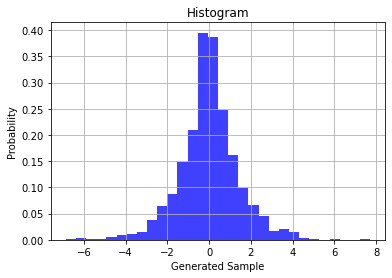

The number of times we generated is 1338


In [36]:
# Initialize an empty list to store the generated values of G^-1(u)
normal_samples = []

avg = []

# Calculate the scale parameter
k = np.exp(1/2) *(np.sqrt(2/np.pi))

t = 0

while len(normal_samples)< 1000:
    u = np.random.uniform(0,1,1)[0]
    t = t+1
    if u <= 0.5:
        g_inverse = np.log(2 * u)
        #v = np.random.uniform(0, k *0.5 * np.exp(-abs(g_inverse)), 1)[0]
        a = np.random.uniform(0,1,1)[0]
        #if v <= (np.exp(-g_inverse**2/2))/ np.sqrt(2 * np.pi):
          #  normal_samples.append(g_inverse)
        if a<=1/k:
            normal_samples.append(g_inverse)
            l = len(normal_samples)
            avg.append(t/l)
    else:
        g_inverse = -np.log(2 - 2 * u)
        #v = np.random.uniform(0, k  *0.5 * np.exp(-abs(g_inverse)) , 1)
        a = np.random.uniform(0,1,1)[0]
        #if v <= (np.exp(-g_inverse**2)/2) / np.sqrt(2 * np.pi):
            #normal_samples.append(g_inverse)
        if a<=1/k:
            normal_samples.append(g_inverse)
            l = len(normal_samples)
            avg.append(t/l)
            
plt.hist(normal_samples, bins=30, density=True, alpha=0.75, color='b')
plt.xlabel('Generated Sample')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()
print("The number of times we generated is", t)

In [37]:
# Calculate the mean
mean = np.mean(avg)
std = np.std(avg)
ci_lower=  mean - 1.96*(std)/np.sqrt(1000)
ci_upper=  mean + 1.96*(std)/np.sqrt(1000)
# Print the results
print("Mean:", mean)
print("CI",[ci_lower, ci_upper])

Mean: 1.3445536384859706
CI [1.340528973741929, 1.3485783032300123]


___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

$$
G(x) = \frac{1}{\pi}\arctan x + \frac{1}{2}.
$$

$$
G^{-1}(y) = \tan\left(\pi(y - \frac{1}{2})\right)
$$


* Generate $U \text{  from } U[0, 1]$.
* Then let$X = F^{-1}(U)$.

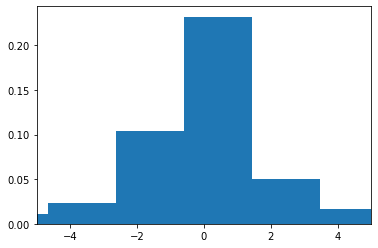

In [8]:
import random
import math
sample = []
for i in range(1000):
    U = random.uniform(0,1)
    X = math.tan(math.pi*(U-1/2))
    sample.append(X)
plt.hist(sample,bins = 1000, density=True)
plt.xlim(-5,5)
plt.show()

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.

We determine the sclae factor by looking at the function of ratio of f and g

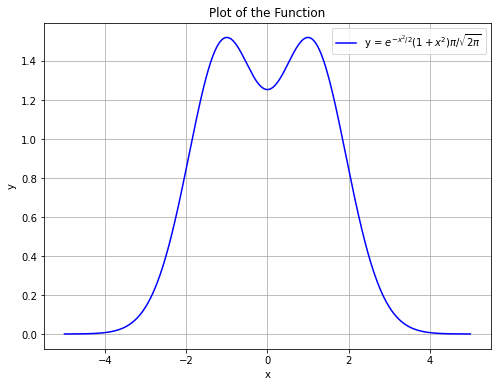

max_y 1.520346779430431


In [9]:

# Create an array of x values
x = np.linspace(-5, 5, 10000)  # Adjust the range as needed

# Calculate the corresponding y values for the function
y = np.exp(-x**2 / 2) * (1 + x**2) * np.pi / np.sqrt(2 * np.pi)
max_y = np.max(y)
max_x = x[np.argmax(y)]
# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = $e^{-x^2/2} (1 + x^2) \pi / \sqrt{2\pi}$', color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the Function')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
print('max_y', max_y)

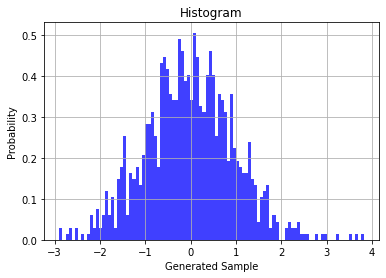

The number of times we generated is 4


In [16]:
new_samples = []

avg_new = []

# Calculate the scale parameter
k = 1.520346779430431


def accept_or_rej(y, u):
    if u <= np.exp(-y ** 2 / 2) / np.sqrt(2 * np.pi) / (k * 1 / (np.pi * (1 + y ** 2))):
        return True
    return False

while len(new_samples)< 1000:
    t = 0
    while True:
        u = np.random.uniform(0,1,1)[0]
        y = math.tan(math.pi*(u-1/2))
        t = t+1
        a = np.random.uniform(0,1,1)[0]
        if accept_or_rej(y, a):
            new_samples.append(y)
            break
    avg_new.append(t)
        
plt.hist(new_samples, bins=100, density=True, alpha=0.75, color='b')
plt.xlabel('Generated Sample')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [20]:
# Calculate the mean
mean_new = np.mean(avg_new)
std_new = np.std(avg_new)
ci_lower_new=  mean_new - 1.96*(std_new)/np.sqrt(1000)
ci_upper_new=  mean_new + 1.96*(std_new)/np.sqrt(1000)
# Print the results
print("Mean:", mean_new)
print("CI is",[ci_lower_new, ci_upper_new])

Mean: 1.528
CI is [1.4706816104064324, 1.5853183895935676]
